In [3]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



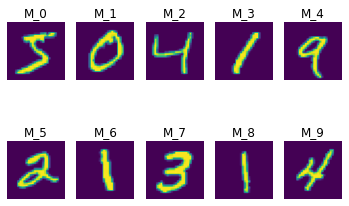

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dens

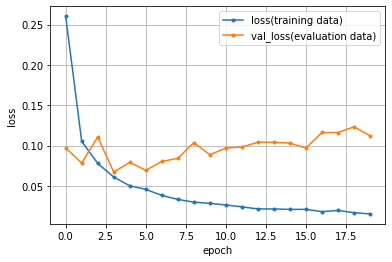

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
%matplotlib inline
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

import time
start = time.time()
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_split=0.1)
end = time.time()
print(f'elasped time:{end - start}s')

score = model.evaluate(x_test, y_test, verbose=0)
print("test_loss:", score[0])
print("test_acc:", score[1])

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label = "loss(training data)")
plt.plot(range(epochs), val_loss, marker='.', label = "val_loss(evaluation data)")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
